In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils

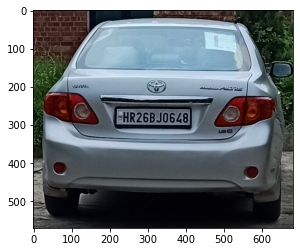

In [13]:
img = cv2.imread("/home/scis/Desktop/ML_DL/6m_0.jpg")
# plt.imshow(img, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

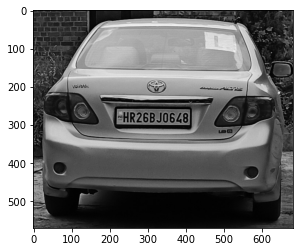

In [14]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))

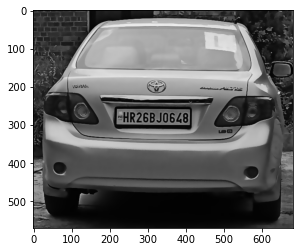

In [15]:
noise_img = cv2.bilateralFilter(gray_img, 11, 17, 17)
plt.imshow(cv2.cvtColor(noise_img, cv2.COLOR_BGR2RGB))

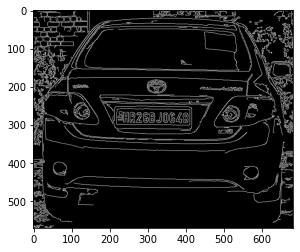

In [16]:
edge_img = cv2.Canny(noise_img, 30, 200)
plt.imshow(cv2.cvtColor(edge_img, cv2.COLOR_BGR2RGB))

In [17]:
edge_points = cv2.findContours(edge_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours = imutils.grab_contours(edge_points)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
plate_points = None
for contour in contours:
    points = cv2.approxPolyDP(contour, 10, True)
    
    if len(points)==4:
        plate_points = points
        print("okay")
        break
plate_points

okay


array([[[220, 259]],

       [[219, 299]],

       [[411, 300]],

       [[411, 260]]], dtype=int32)

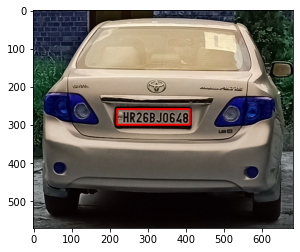

In [18]:
plt.imshow(cv2.rectangle(img, tuple(plate_points[0][0]), tuple(plate_points[2][0]), (255, 0, 0), 3))
# tuple(plate_points[2][0])

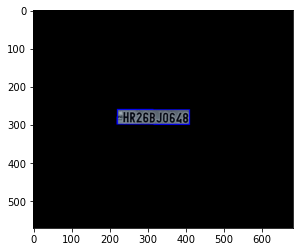

In [19]:
mask = np.zeros(gray_img.shape, np.uint8)
new_img = cv2.drawContours(mask, [plate_points], 0, 255, -1)
new_img = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

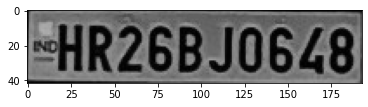

In [20]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
plate_img = gray_img[x1:x2+1, y1:y2+1]

plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))

In [21]:
reader = easyocr.Reader(['en'], gpu=True)
plate_info = reader.readtext(plate_img)
plate_info

[([[11, 1], [193, 1], [193, 42], [11, 42]], 'HRZGBJO6L8', 0.5779533127846643)]

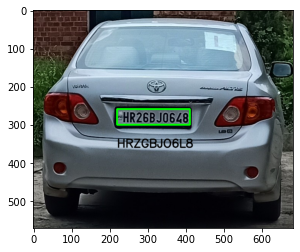

In [22]:
plate_text = plate_info[0][1]

font = cv2.FONT_HERSHEY_SIMPLEX

result = cv2.putText(img, text=plate_text, org=(points[0][0][0], points[1][0][1]+60), 
                     fontFace=font, fontScale=1, color=(0, 0, 0), thickness=2, lineType=cv2.LINE_AA)
result = cv2.rectangle(img, tuple(points[0][0]), tuple(points[2][0]), (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

In [23]:
#'HR26BJO648', 0.4414032148108211      4m_L45.jpg
#'HRZGBJO648', 0.3651295341423729      4m_R45.jpg
#'HRZGB JO648', 0.44937679672224257    6m_L45.jpg
#'HR2GB JO6L8', 0.4527456118109601     6m_R45.jpg

In [24]:
# data = np.array([])
# data = np.concatenate([[plate_img], [plate_info[0][1]], [plate_info[0][2]]], axis=0)
# data